# Artificial Neural Network (ANN,NN)

## Linear Regression
## Logistic Regression

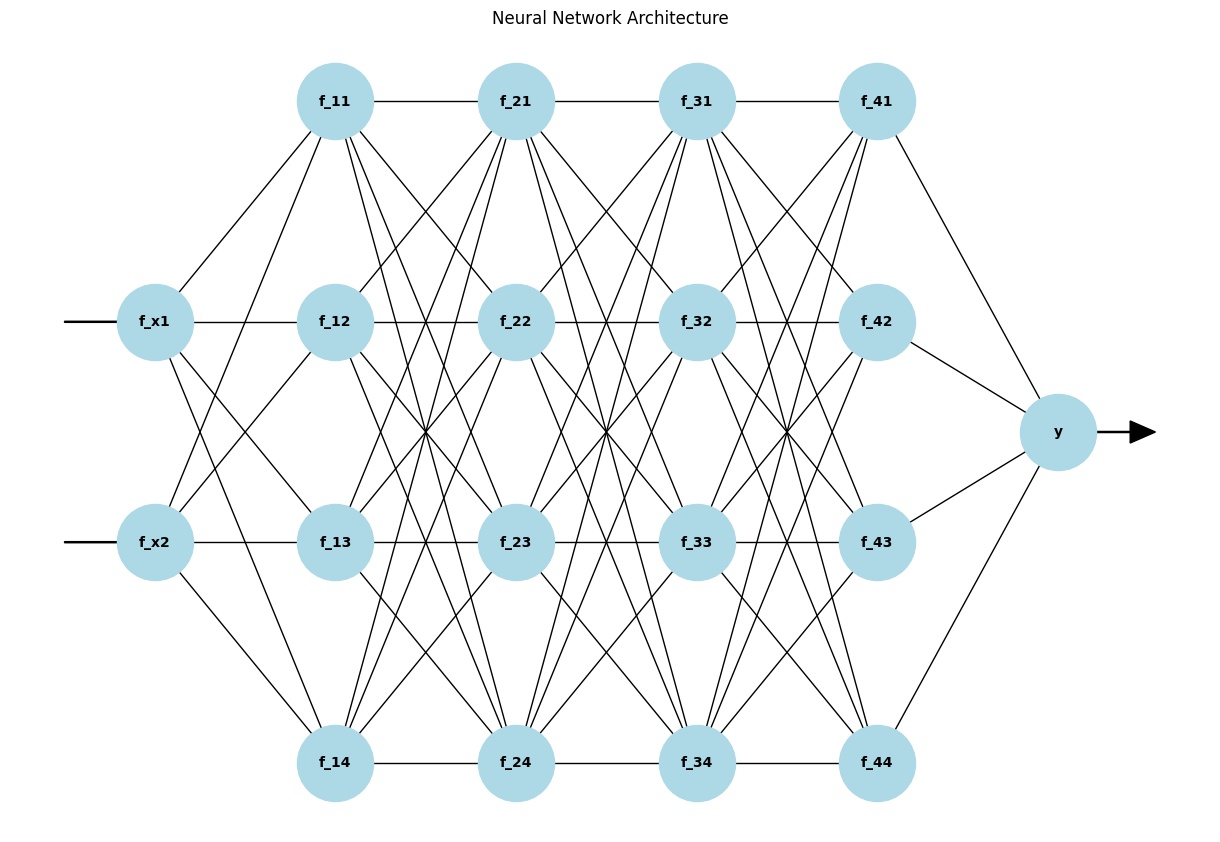

In [25]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_neural_network(layers):
    G = nx.DiGraph()
    pos = {}
    node_labels = {}
    layer_sizes = [len(layer) for layer in layers]
    v_spacing = 1 / float(max(layer_sizes) + 1)
    h_spacing = 1 / float(len(layers) + 1)

    # Add nodes and positions
    for i, layer in enumerate(layers):
        layer_name = f"Layer {i+1}"
        layer_top = ((len(layer) - 1) * v_spacing) / 2  # Center the layer vertically
        for j, node in enumerate(layer):
            node_id = f"{layer_name}_{node}"
            G.add_node(node_id)
            pos[node_id] = (i * h_spacing, layer_top - j * v_spacing)
            node_labels[node_id] = node

    # Add edges
    for i in range(len(layers) - 1):
        layer_name = f"Layer {i+1}"
        next_layer_name = f"Layer {i+2}"
        for node in layers[i]:
            for next_node in layers[i+1]:
                G.add_edge(f"{layer_name}_{node}", f"{next_layer_name}_{next_node}")

    # Draw the graph
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, labels=node_labels, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=False)
    
    # Add arrows for input and output layers
    input_layer_x = -h_spacing / 2
    output_layer_x = len(layers) * h_spacing + h_spacing / 2
    for node in layers[0]:
        plt.arrow(input_layer_x, pos[f"Layer 1_{node}"][1], h_spacing / 2.5, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')
    for node in layers[-1]:
        plt.arrow(pos[f"Layer {len(layers)}_{node}"][0], pos[f"Layer {len(layers)}_{node}"][1], h_spacing / 2.5, 0, head_width=0.02, head_length=0.02, fc='k', ec='k')

    plt.title("Neural Network Architecture")
    plt.show()

# Define the layers
layers = [
    ["f_x1", "f_x2"],  # Input layer
    ["f_11", "f_12", "f_13", "f_14"],  # Hidden layer 1
    ["f_21", "f_22", "f_23", "f_24"],  # Hidden layer 2
    ["f_31", "f_32", "f_33", "f_34"],  # Hidden layer 3
    ["f_41", "f_42", "f_43", "f_44"],  # Hidden layer 4
    ["y"]  # Output layer
]

# Draw the neural network
draw_neural_network(layers)

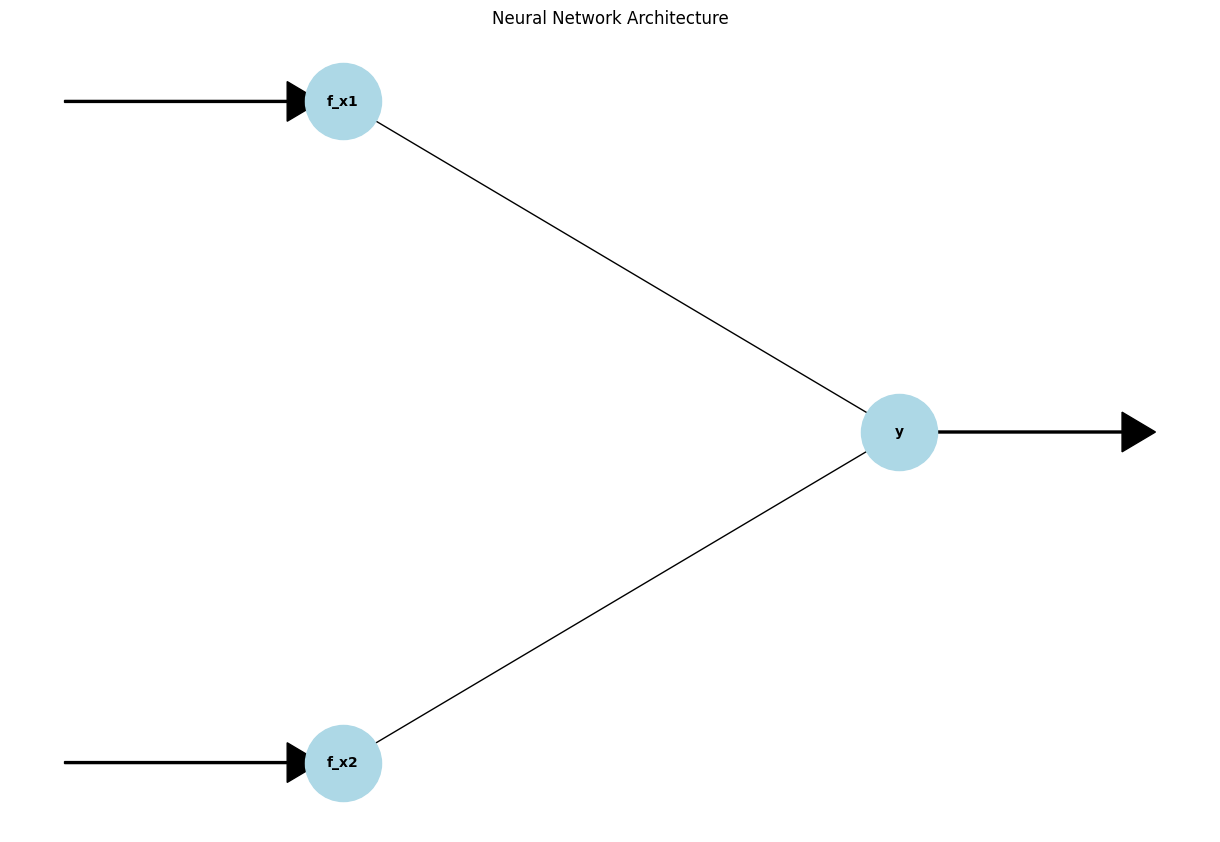

In [26]:
# Define the layers
layers = [
    ["f_x1", "f_x2"],  # Input layer
    ["y"]  # Output layer
]

# Draw the neural network
draw_neural_network(layers)

## Forward Propagation
$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right) 
$$
- ( x_i ) 是输入值。
- ( w_i ) 是权重。
- ( b ) 是偏置。
- ( f ) 是激活函数。
$$\begin{aligned}
f(x) = a(z(x))\\
z(x) = \sum_{i=1}^{n} w_i x_i + b
\end{aligned}$$
- 有的地方用 ( z ) 表示加权和, ( a ) 表示激活函数。

## Backward Propagation
Weight Update
$$\begin{aligned}
&w_i := w_i - \eta \frac{\partial L}{\partial w_i} \\
&b := b - \eta \frac{\partial L}{\partial b}
\end{aligned}$$

## Activation Functions

$$
\begin{align*}
\text{Sigmoid} & : \sigma(x) = \frac{1}{1+e^{-x}} \\
\text{ReLU} & : f(x) = \max(0,x) \\
\text{Leaky ReLU} & : f(x) = \max(0.01x,x) \\
\text{Softmax} & : \text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
\end{align*}
$$

### Linear
即什么都不做，$f(x) = x$

In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Sigmoid
$$\begin{align*}
&\sigma(x) = \frac{1}{1+e^{-x}}\\
&\frac{d\sigma(x)}{dx} = \sigma(x)(1-\sigma(x))
\end{align*}$$
容易求导，但是在$x$很大或很小时，梯度会很小，导致梯度消失，不利于训练。

一般用于输出层，二分类问题。

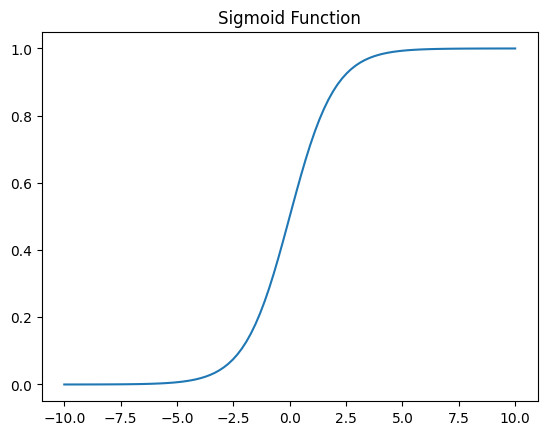

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x = np.linspace(-10, 10, 100)
y = sigmoid(x)
plt.plot(x, y)
plt.title('Sigmoid Function')
plt.show()

### Tanh
$$\begin{align*}
&\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}\\
&\frac{d\tanh(x)}{dx} = 1 - \tanh^2(x)
\end{align*}$$

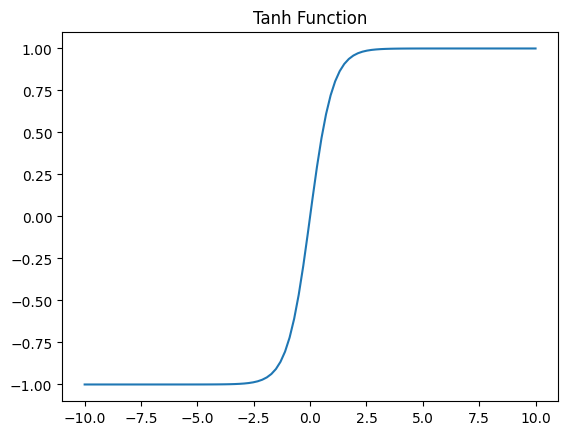

In [4]:
def tanh(x):
    return np.tanh(x)
x = np.linspace(-10, 10, 100)
y = tanh(x)
plt.plot(x, y)
plt.title('Tanh Function')
plt.show()

### ReLU (Rectified Linear Unit)

$$\begin{align*}
&f(x) = \max(0,x)\\
&\frac{df(x)}{dx} = \begin{cases}
0 & x \leq 0\\
1 & x > 0
\end{cases}
\end{align*}
$$
- 当输入大于0时，输出等于输入。
- 当输入小于或等于0时，输出为0。

ReLU的优点是计算简单，并且在训练深度神经网络时能够有效缓解梯度消失问题。

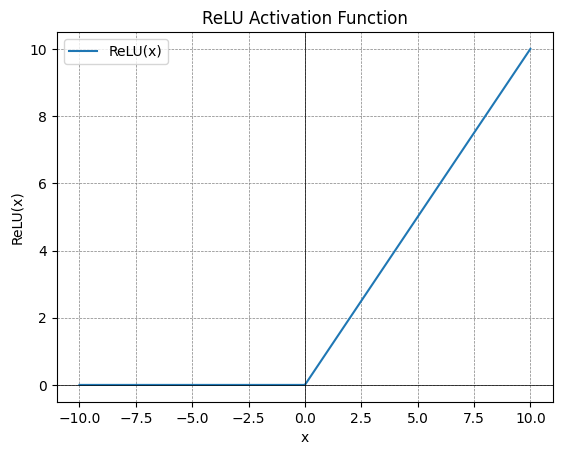

In [1]:
# 定义ReLU函数
def relu(x):
    return np.maximum(0, x)

# 生成x值
x = np.linspace(-10, 10, 400)
y = relu(x)

# 绘制图像
plt.plot(x, y, label='ReLU(x)')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.title('ReLU Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

#### ReLU6
$$
f(x) = \min(\max(0,x),6)
$$

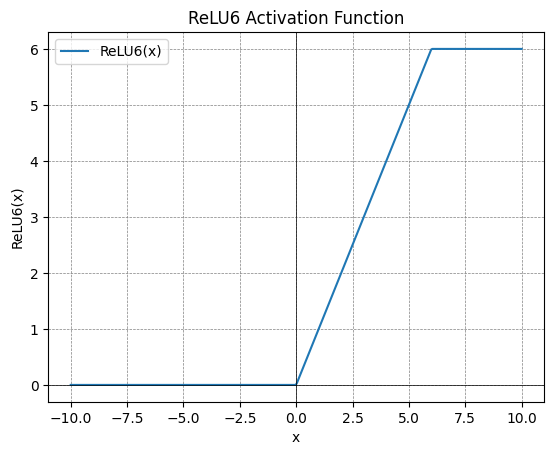

In [7]:
def relu6(x):
    return np.minimum(6, np.maximum(0, x))

# 生成x值
x = np.linspace(-10, 10, 400)
y = relu6(x)

# 绘制图像
plt.plot(x, y, label='ReLU6(x)')
plt.xlabel('x')
plt.ylabel('ReLU6(x)')
plt.title('ReLU6 Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

#### Leaky ReLU
$$
f(x) = \max(0.01x,x)
$$

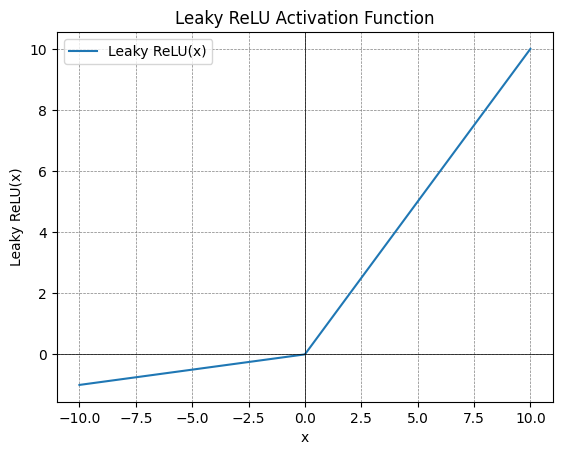

In [11]:
def leaky_relu(x):
    return np.maximum(0.1*x, x)

# 生成x值
x = np.linspace(-10, 10, 400)
y = leaky_relu(x)

# 绘制图像
plt.plot(x, y, label='Leaky ReLU(x)')
plt.xlabel('x')
plt.ylabel('Leaky ReLU(x)')
plt.title('Leaky ReLU Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

### Softmax
$$
\text{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^{n} e^{x_j}}
$$

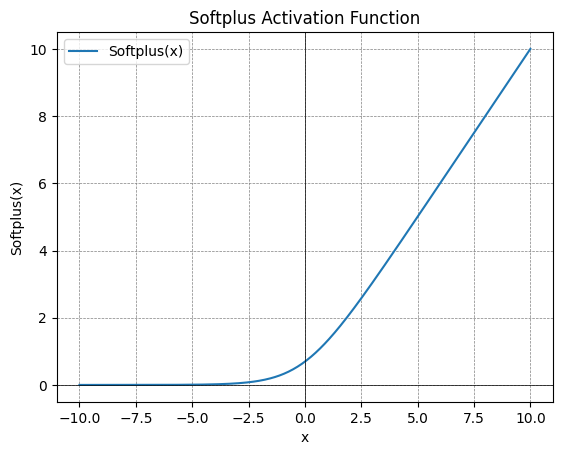

In [15]:
def softplus(x):
    return np.log(1 + np.exp(x))

# 生成x值
x = np.linspace(-10, 10, 400)
y = [softplus(i) for i in x]

# 绘制图像
plt.plot(x, y, label='Softplus(x)')
plt.xlabel('x')
plt.ylabel('Softplus(x)')
plt.title('Softplus Activation Function')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

## Parameters and Hyper parameters
- Parameters: $w_i$ and $b$
- Hyper parameters: 
  - learning rate: $\eta, \alpha$
  - number of iterations: $N$
  - number of hidden layers: $L$
  - number of neurons in each layer: $n_1, n_2, \ldots, n_L$
  - activation function: $g, a, f$
  - w and b initialization: $w_{t0}, b_{t0}$
  - etc.

### w and b initialization
```python
n = 2 # number of features
nl = 2 # number of neurons in the hidden layer
w = np.random.randn(n,nl)*0.01  # (~=-0.03, ~0.03)
b = np.zeros((nl,1)) # (0,0)
```

## example

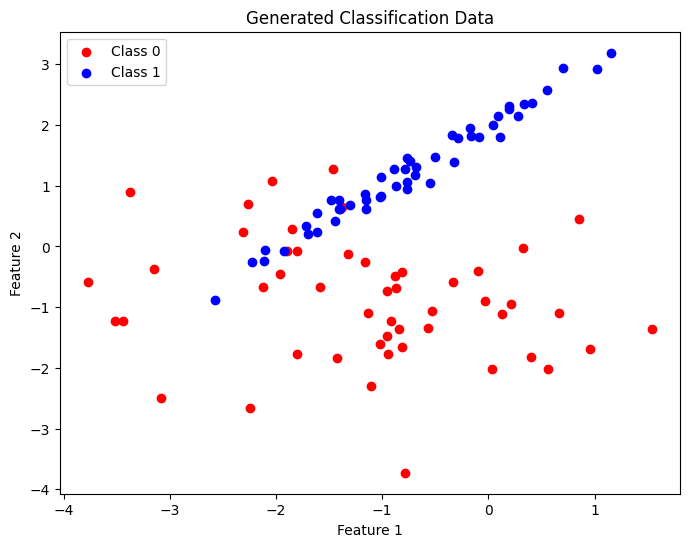

In [31]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 生成分类数据集
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)

# 绘制数据分布
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Classification Data')
plt.legend()
plt.show()

Accuracy: 0.8333333333333334
Confusion Matrix:
[[14  1]
 [ 4 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.92      0.73      0.81        15

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



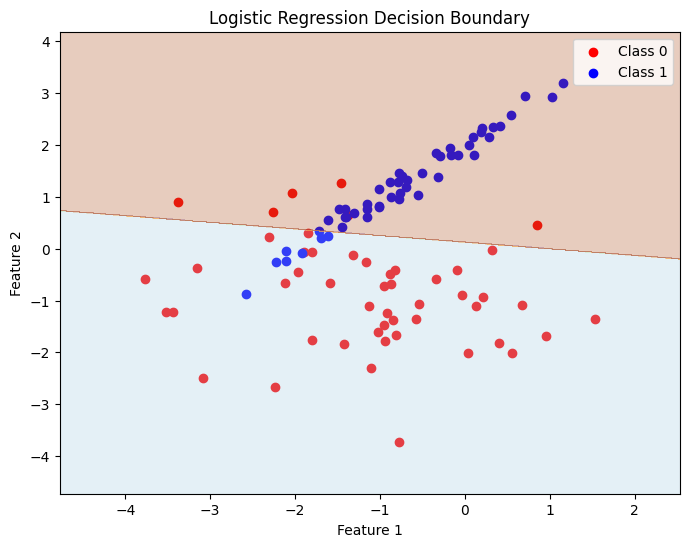

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 绘制决策边界
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

Accuracy: 0.8333333333333334
Confusion Matrix:
[[14  1]
 [ 4 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.92      0.73      0.81        15

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30



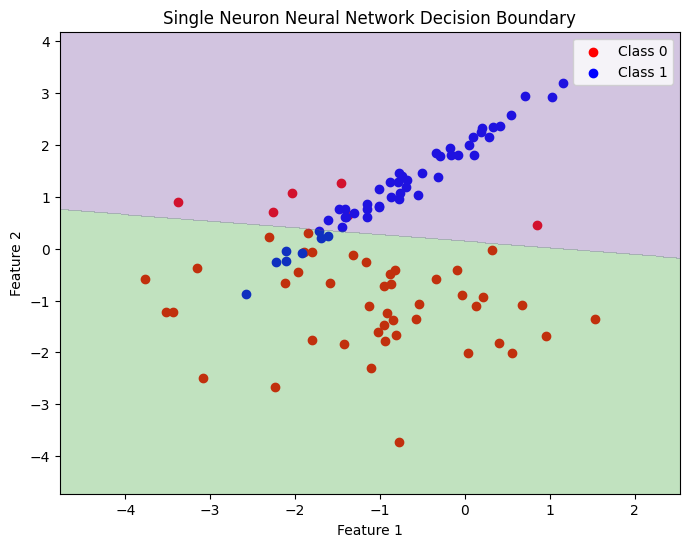

In [35]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 添加偏置项
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# 初始化权重
weights = np.random.rand(X_train.shape[1])

# 定义Sigmoid激活函数
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# 定义Sigmoid导数
def sigmoid_derivative(x):
    return x * (1 - x)

# 训练参数
learning_rate = 0.1
epochs = 10000

# 训练单层神经网络
for epoch in range(epochs):
    # 前向传播
    z = np.dot(X_train, weights)
    predictions = sigmoid(z)
    
    # 计算误差
    error = y_train - predictions
    
    # 反向传播
    adjustments = error * sigmoid_derivative(predictions)
    weights += learning_rate * np.dot(X_train.T, adjustments)

# 预测
z_test = np.dot(X_test, weights)
y_pred = sigmoid(z_test) >= 0.5

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 绘制决策边界
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = sigmoid(np.dot(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], weights)) >= 0.5
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Single Neuron Neural Network Decision Boundary')
plt.legend()
plt.show()

1/1 [==============================] - 0s 111ms/step
Accuracy: 0.8333333333333334
Confusion Matrix:
[[14  1]
 [ 4 11]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        15
           1       0.92      0.73      0.81        15

    accuracy                           0.83        30
   macro avg       0.85      0.83      0.83        30
weighted avg       0.85      0.83      0.83        30

20377/20377 [==============================] - 14s 705us/step


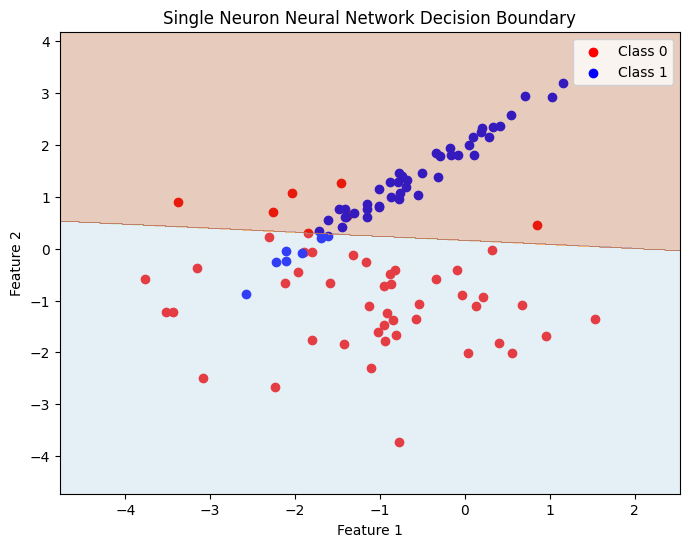

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建包含一个神经元的神经网络
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=1000, verbose=0)

# 预测
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 绘制决策边界
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype("int32")
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Single Neuron Neural Network Decision Boundary')
plt.legend()
plt.show()

1/1 [==============================] - 0s 66ms/step
Accuracy: 0.8666666666666667
Confusion Matrix:
[[14  1]
 [ 3 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.88        15
           1       0.92      0.80      0.86        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

20377/20377 [==============================] - 20s 981us/step


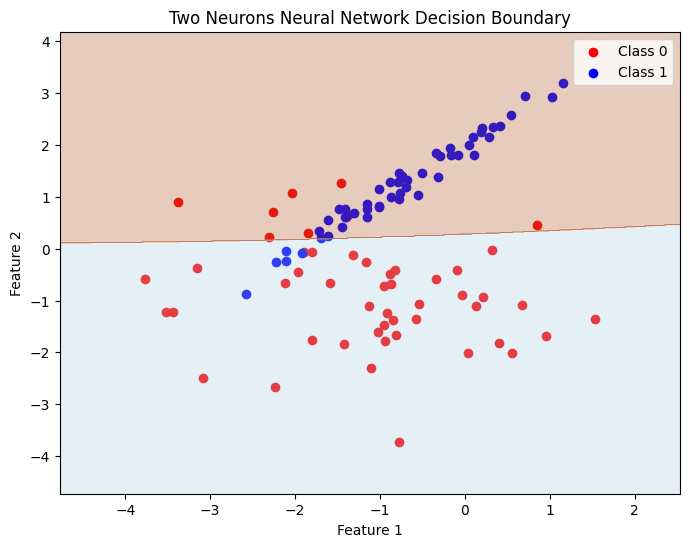

In [37]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建包含两个神经元的神经网络
model = Sequential()
# input_dim=2 输入层有2个特征（即2个输入节点）；一个隐藏层，这个隐藏层有2个神经元，并使用Sigmoid激活函数
model.add(Dense(2, input_dim=2, activation='sigmoid'))
# 输出层有1个神经元，并使用Sigmoid激活函数
model.add(Dense(1, activation='sigmoid'))

# 编译模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=1000, verbose=0)

# 预测
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 绘制决策边界
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > 0.5).astype("int32")
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Two Neurons Neural Network Decision Boundary')
plt.legend()
plt.show()

c:\Users\aa\.conda\envs\ai_310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.8
Confusion Matrix:
[[12  3]
 [ 3 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        15
           1       0.80      0.80      0.80        15

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.80        30
weighted avg       0.80      0.80      0.80        30



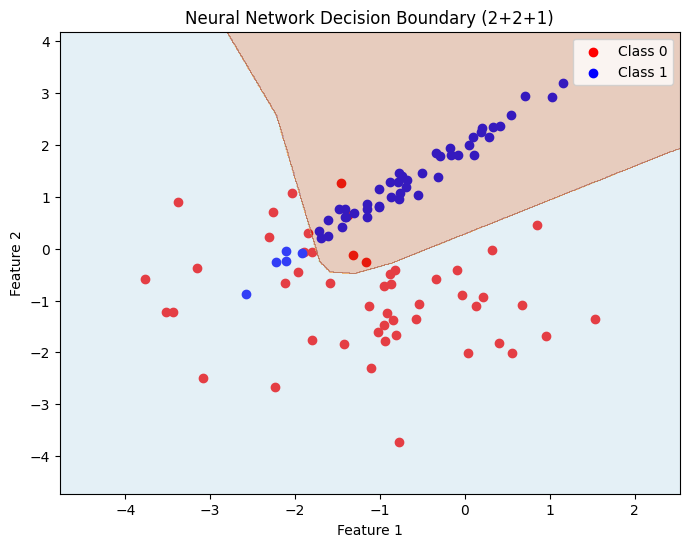

In [50]:
from sklearn.neural_network import MLPClassifier
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 创建包含两个隐藏层的神经网络
model = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', max_iter=1000, random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# 绘制决策边界
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')

# 绘制决策边界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Neural Network Decision Boundary (2+2+1)')
plt.legend()
plt.show()